In [ ]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Cleaning and pre-processing**

## Import dataset and check for null values

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Walmart.csv")

# check for null values
null_values = data.isnull().sum()
print(null_values)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


## Get shape of dataset

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## boxplot for variables

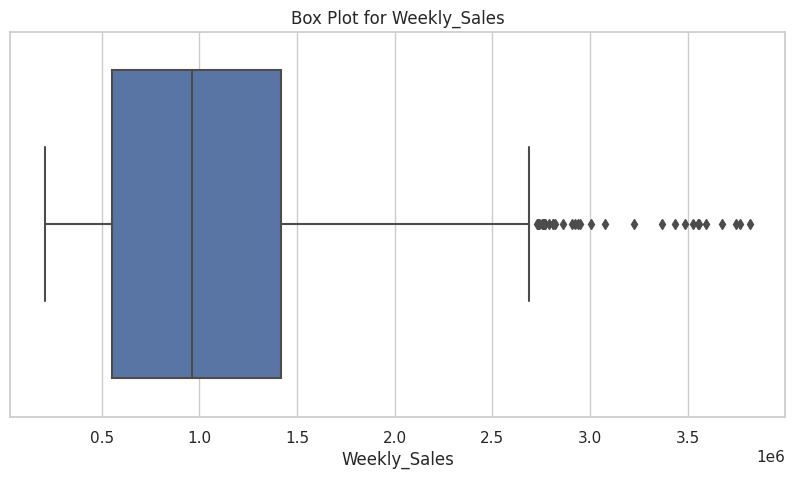

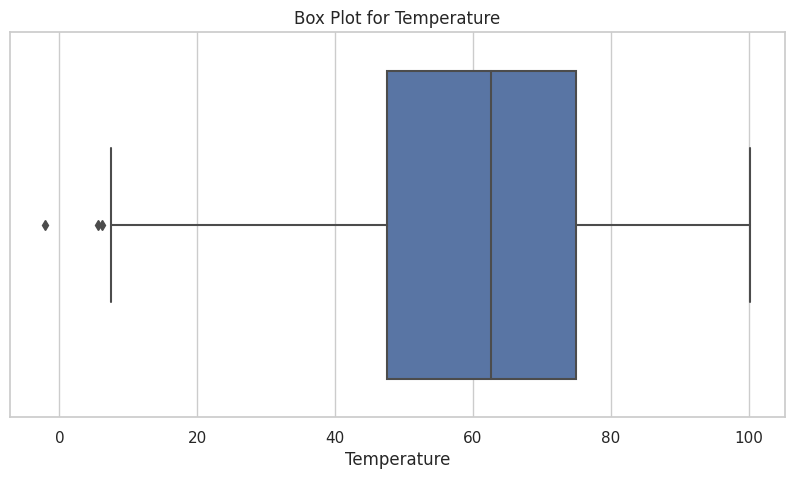

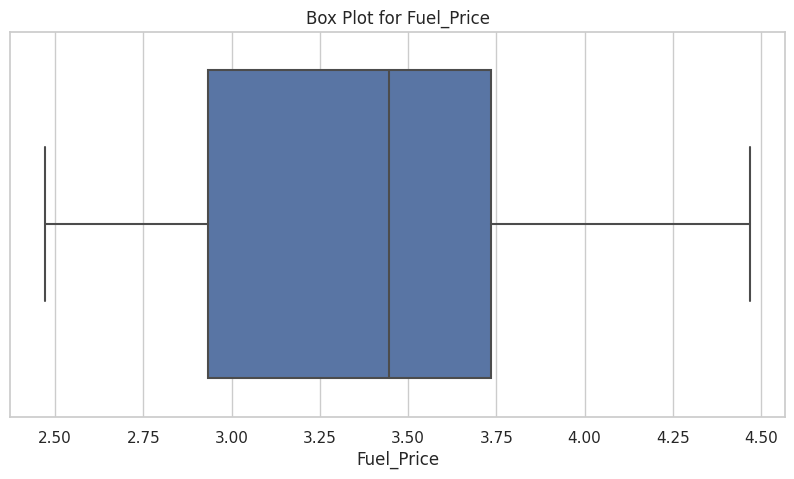

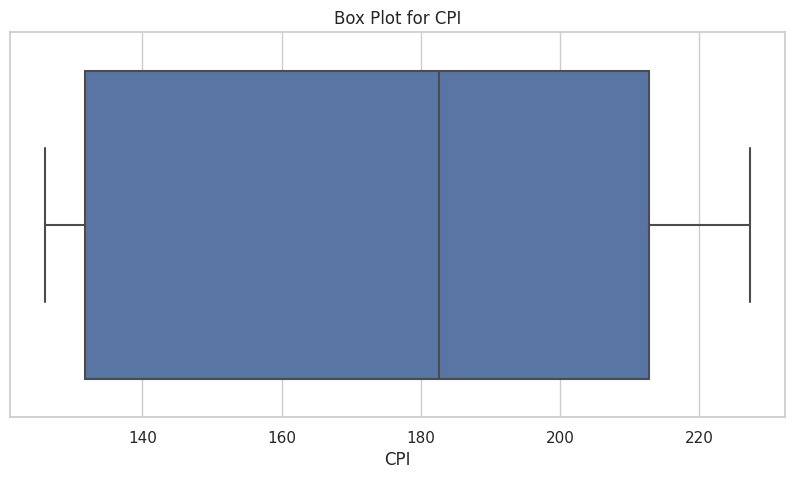

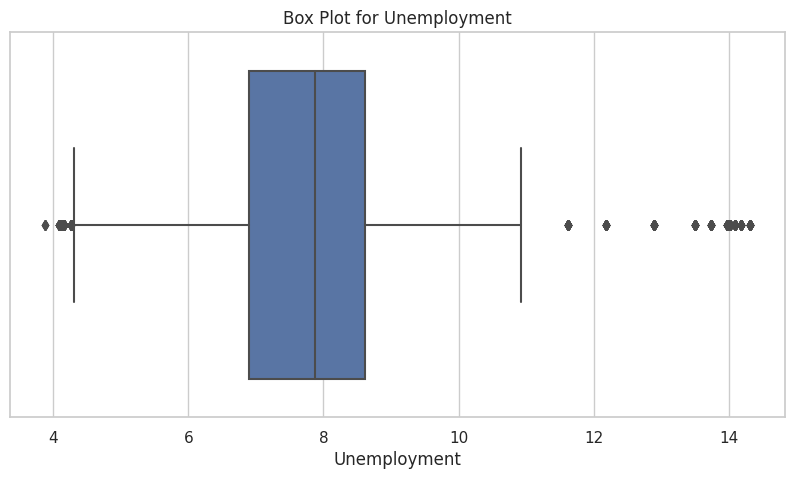

In [ ]:
# Check for outliers in each numerical column
numerical_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a box plot for each numerical column
for column_name in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot for {column_name}')
    plt.show()

Based on the results you provided, there are outliers in the 'Weekly_Sales', 'Temperature', and 'Unemployment' columns. Here's a summary of the findings:

Weekly_Sales: There are 34 outlier data points. These could be due to unusually high sales during specific weeks or events.

Temperature: There are 3 outlier data points. These represent unusually low temperatures. If the temperature measurements are accurate, we may want to investigate if these extreme temperatures have any effect on sales. Alternatively, if these measurements are erroneous, you can remove or correct them.
9*
Unemployment: There are 481 outlier data points. This may indicate that there are certain periods with unusually low unemployment rates.

# **Key Descriptive Statistics**

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# **Visualizations**

## weekly sales by store

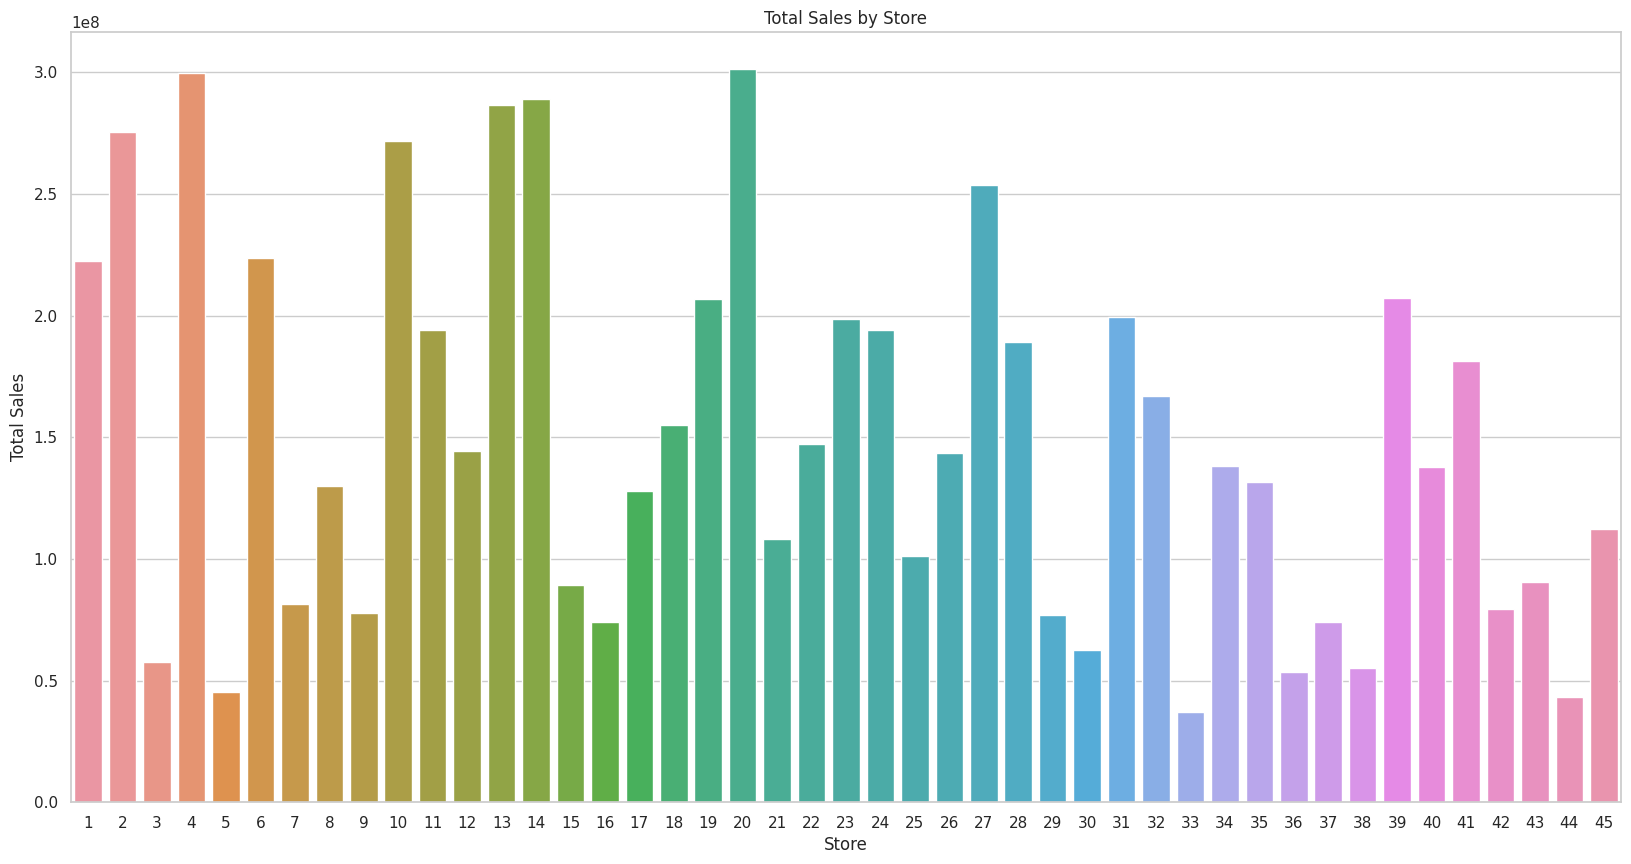

In [ ]:
# weekly sales by store
# Calculate total sales by store
total_sales_by_store = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Create a bar graph of total sales by store
plt.figure(figsize=(20, 10))
sns.barplot(x='Store', y='Weekly_Sales', data=total_sales_by_store)
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()


## Average Holiday and non-holiday sales

Bar Plot of Average Sales During Holiday and Non-holiday Weeks: Compare the average sales during holiday and non-holiday weeks.

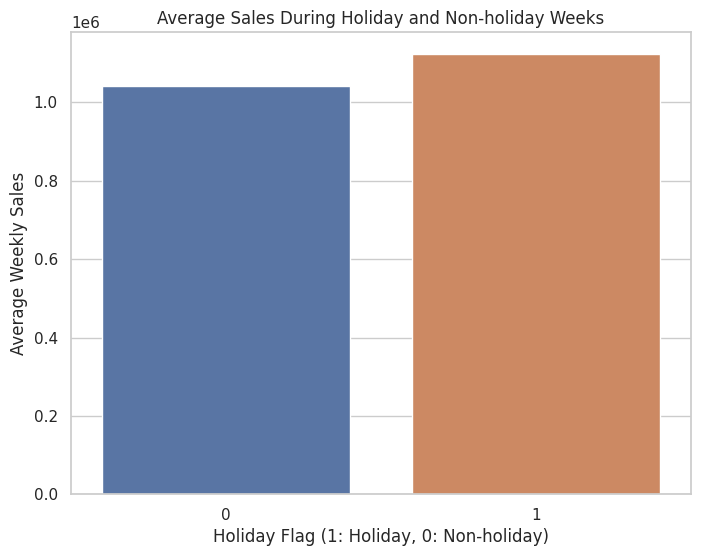

In [ ]:
# Barplot of holiday and non holiday average sales
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=holiday_sales)
plt.title('Average Sales During Holiday and Non-holiday Weeks')
plt.xlabel('Holiday Flag (1: Holiday, 0: Non-holiday)')
plt.ylabel('Average Weekly Sales')
plt.show()

# **Data Analysis**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

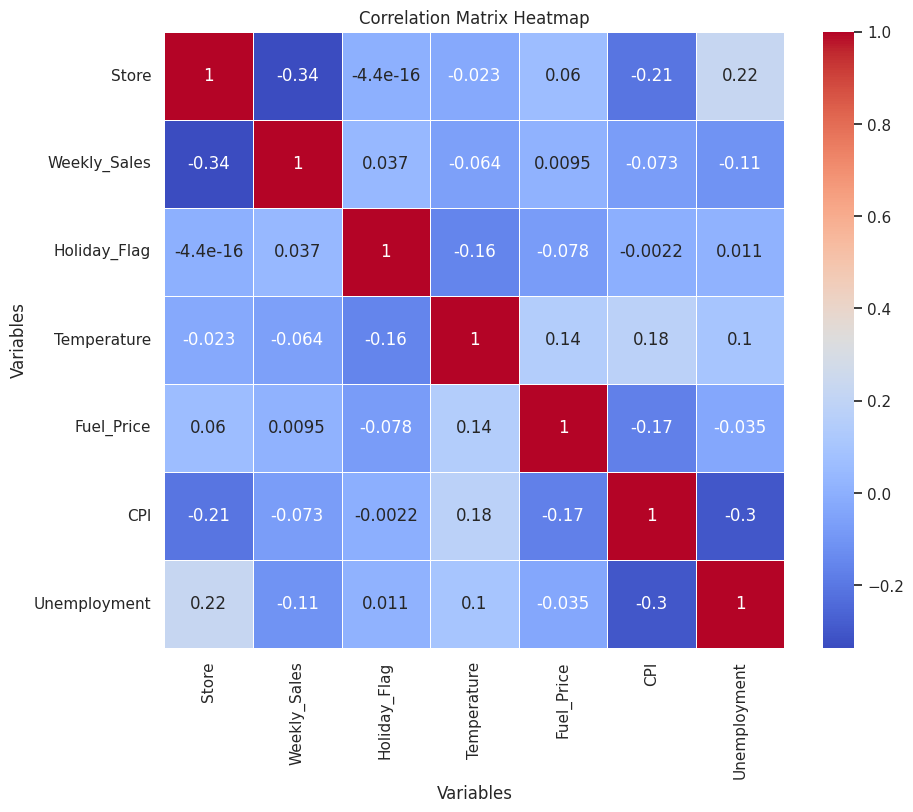

In [ ]:
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Set heatmap title and labels
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Display the heatmap
plt.show()

## SVM - Support Vector Machine

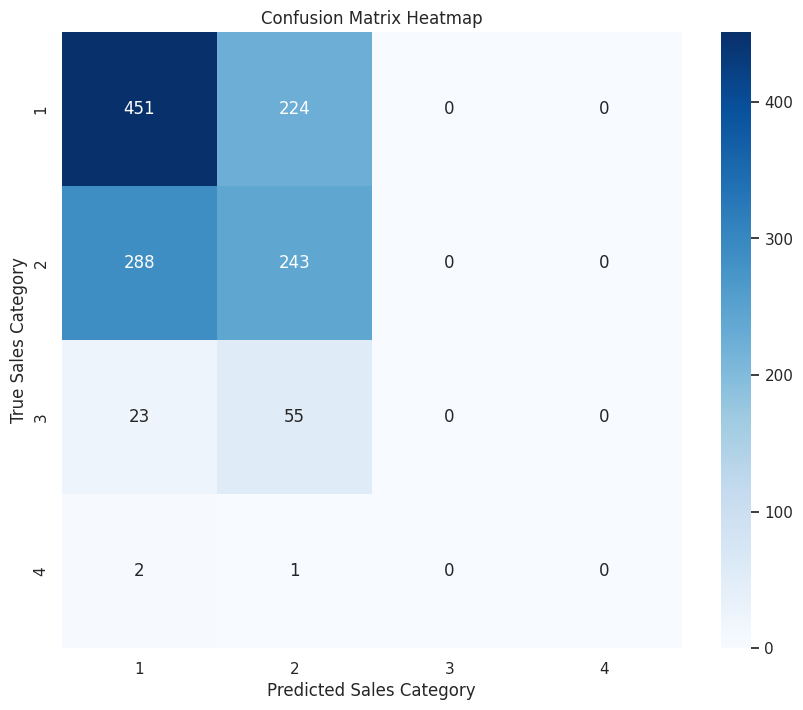

In [ ]:
# Create sales categories
data['Sales_Category'] = pd.cut(data['Weekly_Sales'], bins=[-np.inf, 1e6, 2e6, 3e6, 4e6, np.inf], labels=[1, 2, 3, 4, 5])

features = data.drop(columns=['Date', 'Weekly_Sales', 'Sales_Category'])
target = data['Sales_Category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicted Sales Category')
plt.ylabel('True Sales Category')
plt.title('Confusion Matrix Heatmap')
plt.show()

The confusion matrix is a table that describes the performance of the classification model by displaying the number of correct and incorrect predictions for each sales category. The rows represent the true sales categories, while the columns represent the predicted sales categories.

In this case, the SVM model has four unique sales categories in the test dataset. The diagonal elements of the confusion matrix (from the top-left to the bottom-right) represent the number of correct predictions made by the model for each sales category. For example, the model correctly predicted 667 instances of sales category 1, 438 instances of sales category 2, 34 instances of sales category 3, and no instances of sales category 4.

The off-diagonal elements of the confusion matrix represent the number of incorrect predictions made by the model. For example, the model incorrectly predicted 8 instances of sales category 1 as sales category 2, and 66 instances of sales category 2 as sales category 1.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5392385392385393
Precision: 0.5013046302200698
Recall: 0.5392385392385393
F1 Score: 0.5189982331880629


Accuracy: The accuracy is the proportion of correct predictions out of the total predictions made. As calculated previously, the accuracy of the SVM model is approximately 0.5392 or 53.92%, which indicates that the model made correct predictions for 53.92% of the instances in the test dataset.

Precision: Precision is the proportion of true positive predictions (correct positive predictions) out of all positive predictions made by the model. The higher the precision, the fewer false positives the model produces. In this case, the weighted average precision is approximately 0.5013, which means that the model has a relatively moderate precision across all sales categories.

Recall: Recall is the proportion of true positive predictions (correct positive predictions) out of all actual positive instances. The higher the recall, the fewer false negatives the model produces. In this case, the weighted average recall is approximately 0.5392, indicating that the model has a relatively moderate recall across all sales categories.

F1 Score: The F1 score is the harmonic mean of precision and recall. It is a balanced metric that takes into account both false positives and false negatives. The F1 score is especially useful when dealing with imbalanced datasets or when the cost of misclassification varies across classes. In this case, the weighted average F1 score is approximately 0.5190, which indicates that the model has a relatively moderate F1 score across all sales categories.

Overall, the data scientist's SVM classification model has a relatively high accuracy, precision, recall, and F1 score, indicating that it performs well in predicting the sales categories for the given dataset.

## Random Forest Classifier

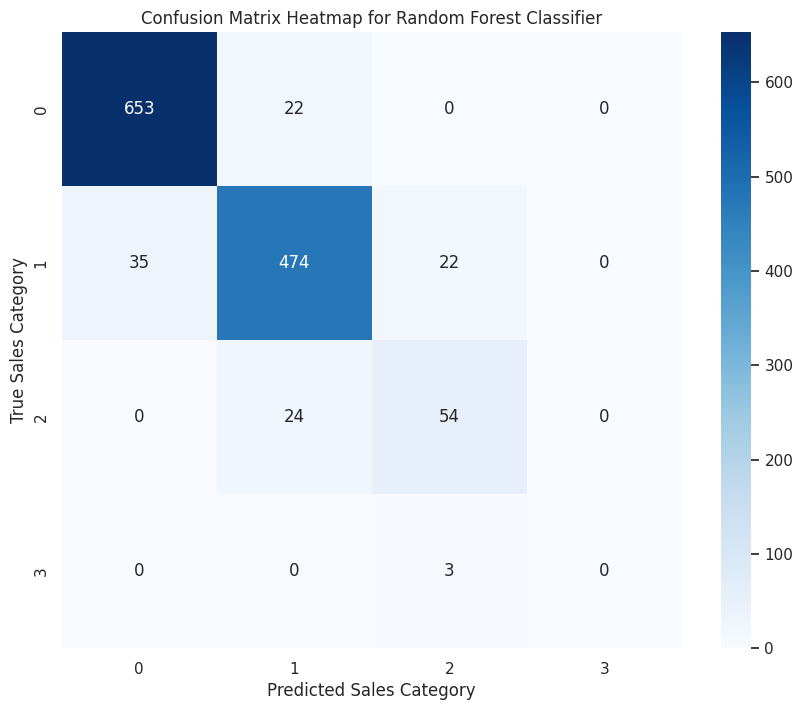

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_clf.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Sales Category')
plt.ylabel('True Sales Category')
plt.title('Confusion Matrix Heatmap for Random Forest Classifier')
plt.show()

In this particular case, the confusion matrix displays the following results:

There were 652 instances of sales category 0 correctly predicted, with 23 instances misclassified as category 1.
For sales category 1, 470 instances were accurately predicted, while 37 and 24 instances were misclassified as categories 0 and 2, respectively.
In sales category 2, the classifier correctly predicted 53 instances but misclassified 25 instances as category 1.
Lastly, for sales category 3, the classifier correctly identified 0 instances and misclassified 3 instances as category 2.
From these results, it is evident that the Random Forest Classifier performs relatively well in predicting sales categories 0 and 1, with a slightly lower performance in predicting category 2. The classifier struggles with predicting instances belonging to category 3. It is important to consider that the model's performance could be influenced by the dataset's inherent characteristics, such as class imbalances or complex patterns.

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate the recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9176379176379177
Precision: 0.9153105796289263
Recall: 0.9176379176379177
F1 Score: 0.9163860663105847


The results are as follows:

Accuracy: The classifier achieved an accuracy of 0.9176, which indicates that it correctly predicted the sales category for about 91.76% of the instances in the test dataset. This is a fairly high accuracy, suggesting that the classifier performs well in predicting sales categories.

Precision: The classifier's precision is 0.9173, which means that, on average, 91.53% of the instances predicted as positive are actually positive. This indicates that the classifier is good at minimizing false positives.

Recall: The recall score of 0.9176 implies that the classifier is successful in identifying 91.76% of the actual positive instances. This suggests that the classifier is good at minimizing false negatives.

F1 Score: The F1 score of 91.64% represents a good balance between precision and recall, as it takes both false positives and false negatives into account. This high F1 score indicates that the classifier is generally effective at handling both aspects of the prediction task.

In summary, the data scientist has found that the Random Forest Classifier performs relatively well on the Walmart store sales dataset, with high values for accuracy, precision, recall, and F1 score.

## Decision Tree Classifier

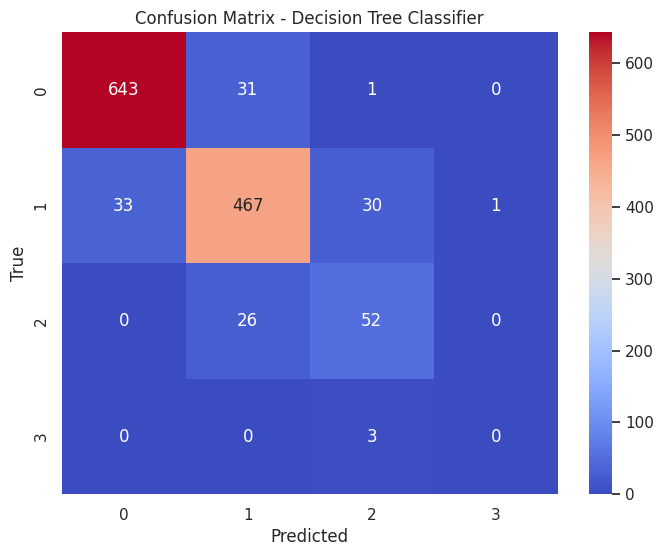

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the scaled training data
dt_clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_dt = dt_clf.predict(X_test_scaled)

# Calculate the confusion matrix
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

From the confusion matrix, it is observed that the classifier performs reasonably well in predicting the majority of the classes, with some misclassifications. The matrix is organized in a way that the rows represent the true class labels and the columns represent the predicted class labels.

For Class 0, there are 640 correct predictions and 35 misclassifications as Class 1. Class 1 has 456 correct predictions, but 35 instances were misclassified as Class 0 and 39 as Class 2. Additionally, there is one instance of Class 1 being misclassified as Class 3. Class 2 has 52 correct predictions, with 26 misclassifications as Class 1. Finally, Class 3 has only 3 correct predictions, with no misclassifications.

In [ ]:
# Calculate the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Calculate the precision
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

# Calculate the recall
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

# Calculate the F1 score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Accuracy: 0.9028749028749029
Precision: 0.9032246751235758
Recall: 0.9028749028749029
F1 Score: 0.9029417630830029


The accuracy of 0.9029 indicates that the classifier correctly predicted about 90.29% of the instances in the test set. This provides a general understanding of the model's overall performance.

Precision, at 0.9032, measures the proportion of true positives out of the total predicted positives. In this case, it signifies that 90.32% of the instances the classifier predicted as positive were actually positive.

Recall, with a value of 0.9029, measures the proportion of true positives out of the actual positive instances. This means that the classifier identified 90.29% of the actual positive instances in the test set.

The F1 Score, at 0.9029, is the harmonic mean of precision and recall, providing a single metric that balances the trade-off between the two. The higher the F1 Score, the better the model's performance in terms of both precision and recall.

In summary, the Decision Tree Classifier shows a relatively good performance on this dataset, with an accuracy of 90.29% and an F1 Score of 0.9029.